In [1]:
!pip install numpy


In [2]:
!pip install opencv-python

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img=cv2.imread('C:/sports person classifier/model/testimages/Viratkohli.jpg')
img.shape

(1038, 1600, 3)

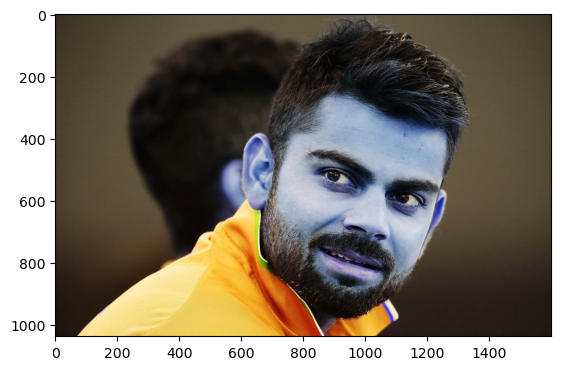

In [5]:
plt.imshow(img)
plt.show()

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1038, 1600)

In [7]:
gray

array([[44, 44, 44, ..., 53, 52, 52],
       [44, 44, 44, ..., 52, 52, 52],
       [44, 44, 44, ..., 52, 52, 52],
       ...,
       [19, 19, 19, ..., 23, 23, 23],
       [19, 19, 19, ..., 23, 23, 23],
       [19, 19, 19, ..., 23, 23, 23]], dtype=uint8)

In [8]:
plt.imshow(gray,cmap='gray')

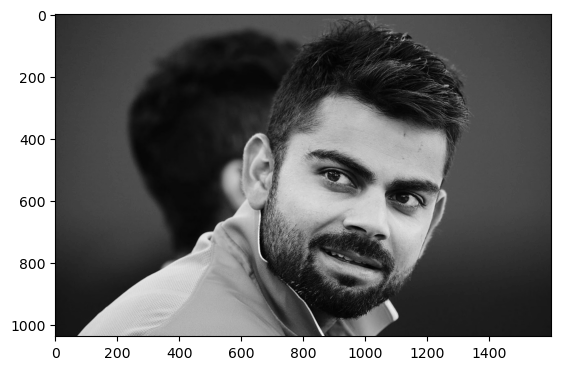

In [9]:
plt.show()

In [10]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[670, 285, 671, 671]])

In [11]:
(x,y,w,h)=faces[0]
x,y,w,h

(670, 285, 671, 671)

In [12]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),11)
plt.imshow(face_img)

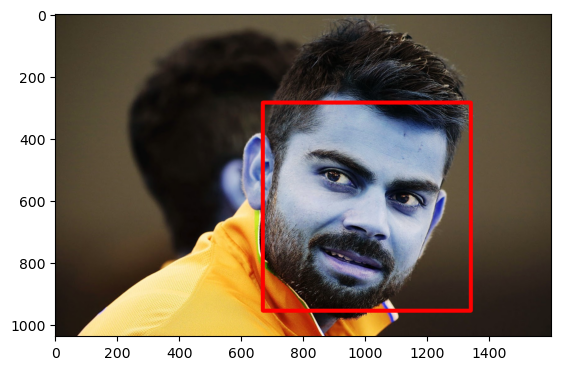

In [13]:
plt.show()

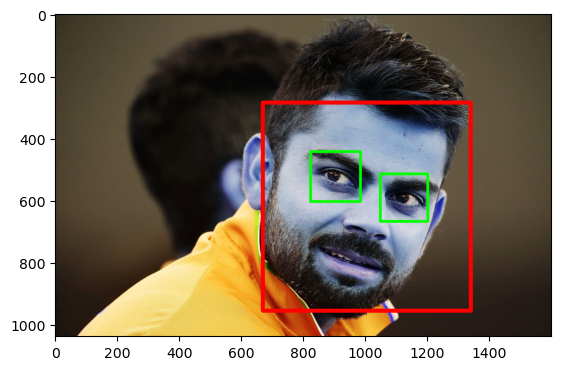

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),7)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [15]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

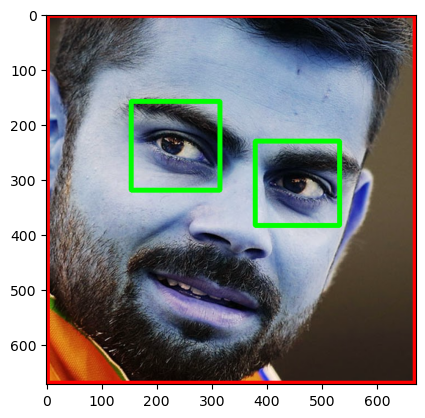

In [16]:
plt.show()

In [17]:
cropped_img=np.array(roi_color)
cropped_img.shape

(671, 671, 3)

In [18]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    

In [19]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

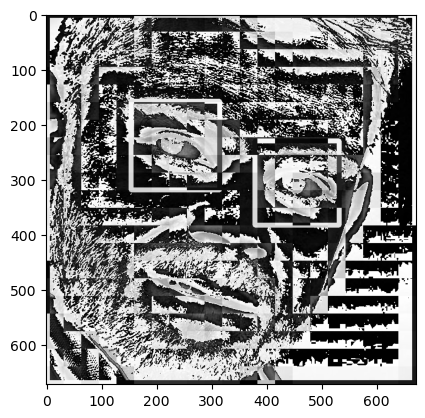

In [20]:
plt.show()

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"[ERROR] Could not read image: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [22]:
original_image=cv2.imread('C:/sports person classifier/model/testimages/Viratkohli.jpg')
plt.imshow(original_image)

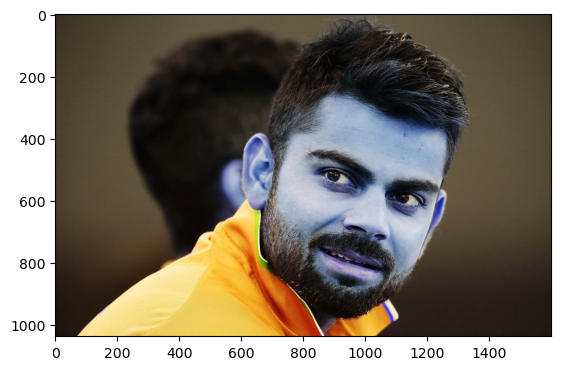

In [23]:
plt.show()

In [24]:
cropped_image=get_cropped_image_if_2_eyes('C:/sports person classifier/model/testimages/Viratkohli.jpg')
plt.imshow(cropped_image)

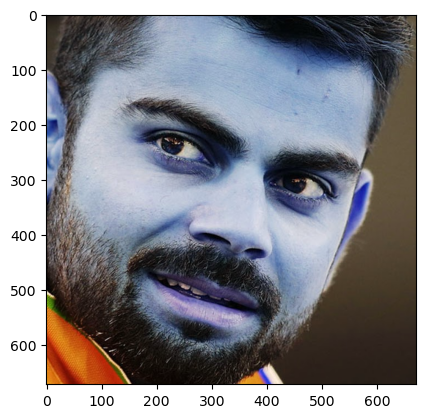

In [25]:
plt.show()

In [26]:
org_image_obstructed=cv2.imread('C:/sports person classifier/model/testimages/Virat-Kohli-2.jpg')
plt.imshow(org_image_obstructed)

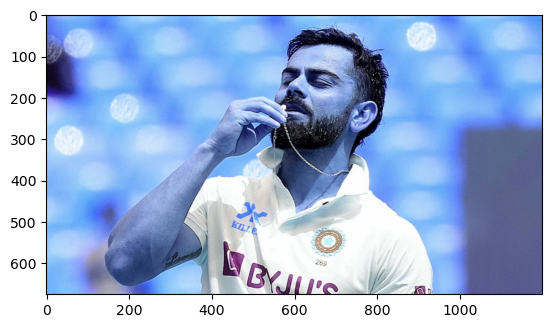

In [27]:
plt.show()

In [60]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('C:/sports person classifier/model/testimages/Virat-Kohli-2.jpg')
cropped_image_no_2_eyes

In [61]:
path_to_data = "C:/sports person classifier/model/dataset"
path_to_cr_data = "C:/sports person classifier/model/dataset/cropped/"

In [62]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.name.lower() != 'cropped':
        img_dirs.append(entry.path)

In [63]:
img_dirs

['C:/sports person classifier/model/dataset\\Carolina Marin',
 'C:/sports person classifier/model/dataset\\lionelmessi',
 'C:/sports person classifier/model/dataset\\Roger Federer',
 'C:/sports person classifier/model/dataset\\serina williams',
 'C:/sports person classifier/model/dataset\\Sharvapova',
 'C:/sports person classifier/model/dataset\\ViratKohli']

In [64]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [65]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data + celebrity_name)
                if not os.path.exists(cropped_folder):
                   os.makedirs(cropped_folder)
                   cropped_image_dirs.append(cropped_folder)
                   print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = os.path.join(cropped_folder , cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Carolina Marin
Generating cropped images in folder:  C:/sports person classifier/model/dataset/cropped/Carolina Marin
lionelmessi
Generating cropped images in folder:  C:/sports person classifier/model/dataset/cropped/lionelmessi
Roger Federer
Generating cropped images in folder:  C:/sports person classifier/model/dataset/cropped/Roger Federer
serina williams
Generating cropped images in folder:  C:/sports person classifier/model/dataset/cropped/serina williams
Sharvapova
Generating cropped images in folder:  C:/sports person classifier/model/dataset/cropped/Sharvapova
ViratKohli
Generating cropped images in folder:  C:/sports person classifier/model/dataset/cropped/ViratKohli


In [66]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Carolina Marin': ['C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin1.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin2.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin3.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin4.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin5.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin6.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin7.png',
  'C:/sports person classifier/model/dataset/cropped/Carolina Marin\\Carolina Marin8.png'],
 'lionelmessi': ['C:/sports person classifier/model/dataset/cropped/lionelmessi\\lionelmessi1.png',
  'C:/sports person classifier/model/dataset/cropped/lionelmessi\\lionelmessi10.png',
  'C:/sports person classifier/model/dataset/cropped/lionelmessi\\l

In [67]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Carolina Marin': 0,
 'lionelmessi': 1,
 'Roger Federer': 2,
 'serina williams': 3,
 'Sharvapova': 4,
 'ViratKohli': 5}

In [68]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    print(f"Processing celebrity: {celebrity_name}, number of images: {len(training_files)}")
    for training_image in training_files:
        print(f"Reading image: {training_image}")
        img = cv2.imread(training_image)
        if img is None:
            print(f"Warning: Could not read image {training_image}")
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

print(f"Total samples in X: {len(X)}")
if len(X) > 0:
    print(f"Length of first sample: {len(X[0])}")
else:
    print("X is empty!")


Processing celebrity: Carolina Marin, number of images: 8
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin1.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin2.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin3.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin4.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin5.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin6.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin7.png
Reading image: C:/sports person classifier/model/dataset/cropped/Carolina Marin\Carolina Marin8.png
Processing celebrity: lionelmessi, number of images: 36
Reading image: C:/sports person classifier/model/dataset/cropped/lionelmessi\lionelmes

In [69]:
len(X[0])

4096

In [70]:
X[0]

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [71]:
y[0]

0

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(179, 4096)

In [73]:
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import datasets

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [90]:
len(X_test)

45

In [75]:
print(classification_report(y_test, pipe.predict(X_test),zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.67      0.86      0.75         7
           2       1.00      0.33      0.50         9
           3       0.18      0.67      0.29         3
           4       0.73      0.89      0.80         9
           5       1.00      0.79      0.88        14

    accuracy                           0.67        45
   macro avg       0.76      0.59      0.54        45
weighted avg       0.84      0.67      0.67        45



In [76]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [77]:
model_params = {
    'svm': {'model': svm.SVC(gamma='auto',probability=True),
            'params' : {'svc__C': [1,10,100,1000], 'svc__kernel': ['rbf','linear']}},
    
    'random_forest': {'model': RandomForestClassifier(),
                      'params' : {'randomforestclassifier__n_estimators': [1,5,10]}},
    
    'logistic_regression' : {'model': LogisticRegression(solver='liblinear',multi_class='auto'),
                             'params': {'logisticregression__C': [1,5,10]}}
    }

In [93]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it w

,model,best_score,best_params
0,svm,0.679202,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.604558,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.775783,{'logisticregression__C': 1}


In [79]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [80]:
best_estimators['svm'].score(X_test,y_test)

0.6888888888888889

In [81]:
best_estimators['random_forest'].score(X_test,y_test)

0.37777777777777777

In [82]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7555555555555555

In [83]:
best_clf = best_estimators['svm']

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 0,  1,  0,  2,  0,  0],
       [ 0,  5,  0,  1,  0,  1],
       [ 0,  0,  4,  4,  1,  0],
       [ 0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  1,  8,  0],
       [ 0,  1,  0,  0,  1, 12]], dtype=int64)

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

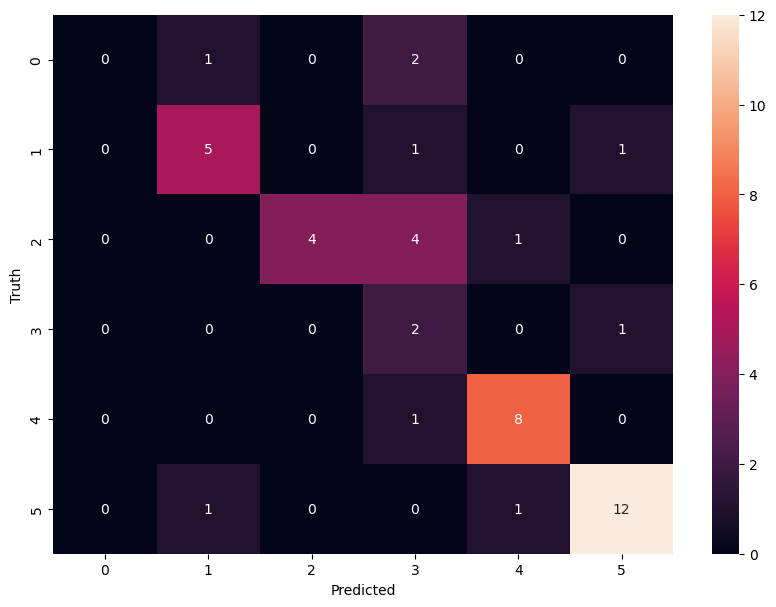

In [86]:
plt.show()

In [87]:
class_dict

{'Carolina Marin': 0,
 'lionelmessi': 1,
 'Roger Federer': 2,
 'serina williams': 3,
 'Sharvapova': 4,
 'ViratKohli': 5}

In [88]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [94]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))